In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random
import shutil
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
df = pd.read_csv("Brain Tumor.csv")
df.head(5)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [3]:
TRAIN_POS_DIR = 'Data/train/Positive'
TRAIN_NEG_DIR = 'Data/train/Negative'
TEST_POS_DIR = 'Data/test/Positive'
TEST_NEG_DIR = 'Data/test/Negative'

In [14]:
TRAIN_DATA = 'Data/train'
VAL_DATA = 'Data/test'
image_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = image_datagen.flow_from_directory(TRAIN_DATA,
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size = (224, 224))

val_datagen = image_datagen.flow_from_directory(VAL_DATA,
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size = (224, 224))

Found 2880 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [16]:
model2 = Sequential()
model2.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model2.add(Conv2D(64, (3,3), activation='relu', padding='same'))
#first pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3,3), activation='relu', padding='same'))
#second pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3,3), activation='relu', padding='same'))
#third pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
#fourth pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
#fifth pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(2, activation='softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [17]:
model2.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history2 = model2.fit(train_datagen,
                      epochs = 20,
                      verbose = 1,
                      validation_data = val_datagen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 90 steps, validate for 10 steps
Epoch 1/20
90/90 [==============================] - 4483s 50s/step - loss: 0.6927 - accuracy: 0.6788 - val_loss: 0.6923 - val_accuracy: 0.7312
Epoch 2/20
90/90 [==============================] - 4806s 53s/step - loss: 0.6921 - accuracy: 0.6694 - val_loss: 0.6917 - val_accuracy: 0.7875
Epoch 3/20
90/90 [==============================] - 5515s 61s/step - loss: 0.6917 - accuracy: 0.7451 - val_loss: 0.6913 - val_accuracy: 0.7531
Epoch 4/20
90/90 [==============================] - 4325s 48s/step - loss: 0.6914 - accuracy: 0.7312 - val_loss: 0.6909 - val_accuracy: 0.7594
Epoch 5/20
90/90 [==============================] - 4269s 47s/step - loss: 0.6911 - accuracy: 0.7247 - val_loss: 0.6906 - val_accuracy: 0.7812
Epoch 6/20
90/90 [==============================] - 4272s 47s/step - loss: 0.6908 - accuracy: 0.7424 - val_loss: 0.6903 - val_accuracy: 0.7750
Epoch 7/20
90/90 [==============================] 

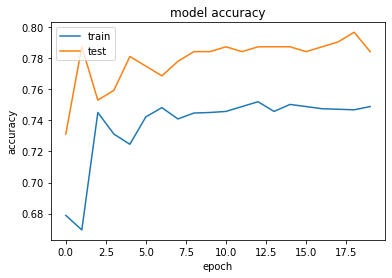

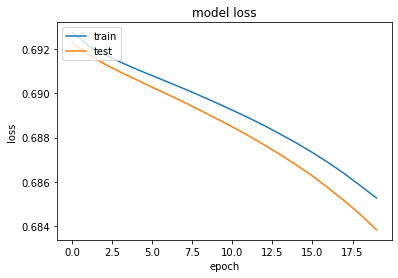

In [20]:
acc = history2.history['accuracy']
loss = history2.history['loss']
val_acc = history2.history['val_accuracy']
val_loss = history2.history['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model2.save("model-v3-cnn-vgg16.h5")

In [15]:
tf.keras.backend.clear_session()